In [11]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import ast
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import html

In [12]:
# Sauvegarder les DataFrames d'entraînement et de test dans des fichiers CSV
df_train = pd.read_csv('stackoverflow_questions_train.csv')
df_test = pd.read_csv('stackoverflow_questions_test.csv')

In [13]:
# Fonction pour convertir une chaîne de caractères en liste
def convert_tags_to_list(tag_str):
    try:
        # Utiliser ast.literal_eval pour convertir la chaîne en liste
        return ast.literal_eval(tag_str)
    except (ValueError, SyntaxError):
        print(f"Failed to convert: {tag_str}")
        return []

# Appliquer la conversion à la colonne 'tags'
df_train['tags'] = df_train['tags'].apply(convert_tags_to_list)

# Fonction pour nettoyer le texte en utilisant une regex
def clean_text(text):
    # Garder uniquement les caractères alphanumériques et les espaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Tokenizer
def tokenizer_fct(sentence):
    sentence_clean = clean_text(sentence)
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words):
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words):
    lw = [w.lower() for w in list_words if (not w.startswith("@"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
def lemma_fct(list_words):
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text):
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text):
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text):
    word_tokens = tokenizer_fct(desc_text)
    lw = lower_start_fct(word_tokens)
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

def transform_use_fct(text):
    text = ' '.join(text.split())
    text = html.unescape(text)
    text = re.sub('[^A-Za-z0-9 ,\?\'\"-._\+\!/\`@=;:]+', '', text)
    return text

# Appliquer les transformations au DataFrame
df_train['sentence_bow'] = df_train['title'].apply(lambda x: transform_bow_fct(x))
df_train['sentence_bow_lem'] = df_train['title'].apply(lambda x: transform_bow_lem_fct(x))
df_train['sentence_dl'] = df_train['title'].apply(lambda x: transform_dl_fct(x))
df_train['sentence_use'] = df_train['title'].apply(lambda x: transform_use_fct(x))

df_test['sentence_bow'] = df_test['title'].apply(lambda x: transform_bow_fct(x))
df_test['sentence_bow_lem'] = df_test['title'].apply(lambda x: transform_bow_lem_fct(x))
df_test['sentence_dl'] = df_test['title'].apply(lambda x: transform_dl_fct(x))
df_test['sentence_use'] = df_test['title'].apply(lambda x: transform_use_fct(x))

# Afficher le DataFrame nettoyé
print(df_train.info())

# Afficher le DataFrame nettoyé
print(df_test.info())

df_train.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              8036 non-null   object
 1   title             8036 non-null   object
 2   tags              8036 non-null   object
 3   score             8036 non-null   int64 
 4   answer_count      8036 non-null   int64 
 5   sentence_bow      8036 non-null   object
 6   sentence_bow_lem  8036 non-null   object
 7   sentence_dl       8036 non-null   object
 8   sentence_use      8036 non-null   object
dtypes: int64(2), object(7)
memory usage: 565.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              2010 non-null   object
 1   title             2010 non-null   object
 2   tags              2010 non-null   ob

,date,title,tags,score,answer_count,sentence_bow,sentence_bow_lem,sentence_dl,sentence_use
0,2024-06-07 12:53:39,JSF Composite Components: Facet Content Not Re...,"[jsf, primefaces, xhtml, facet, composite-comp...",2,1,jsf composite components facet content not ren...,jsf composite component facet content not rend...,jsf composite components facet content not ren...,JSF Composite Components: Facet Content Not Re...
1,2024-07-11 16:40:13,bootstrap react Accordion - collapse / expand ...,"[reactjs, bootstrap-5, accordion]",1,1,bootstrap react accordion collapse expand via ...,bootstrap react accordion collapse expand via ...,bootstrap react accordion collapse expand via ...,bootstrap react Accordion - collapse / expand ...
2,2024-06-13 21:50:46,What is the internal data bus?,"[cpu-architecture, 6502]",1,1,what internal data bus,what internal data bus,what is the internal data bus,What is the internal data bus?
3,2024-06-21 19:53:39,Efficiently Marking Holidays in a Data Column,"[python, dataframe, python-polars, python-holi...",5,2,efficiently marking holidays data column,efficiently marking holiday data column,efficiently marking holidays in a data column,Efficiently Marking Holidays in a Data Column
4,2024-06-11 20:44:14,How to visualize CNN architecture using draw_c...,"[python, architecture, conv-neural-network, vi...",1,2,how visualize cnn architecture using drawconvet,how visualize cnn architecture using drawconvet,how to visualize cnn architecture using drawco...,How to visualize CNN architecture using draw_c...


In [14]:
# # Sauvegarder le DataFrame nettoyé dans un fichier CSV
df_train.to_csv('stackoverflow_questions_cleaned_train.csv', index=False)
df_test.to_csv('stackoverflow_questions_cleaned_test.csv', index=False)

In [15]:

# Afficher quelques questions avec leurs tags associés
def display_sample_questions_with_tags(df, num_samples=5):
    sample_df = df[['title', 'tags']].sample(num_samples)
    for index, row in sample_df.iterrows():
        print(f"Title: {row['title']}")
        print(f"Tags: {row['tags']}")
        print("-" * 80)

# Afficher 5 questions échantillons avec leurs tags
display_sample_questions_with_tags(df_train, num_samples=5)

Title: Hibernate StatelessSession.upsert() based on @NaturalId
Tags: ['hibernate', 'jpa', 'orm', 'upsert', 'stateless-session']
--------------------------------------------------------------------------------
Title: Need a custom log-axis for my ggplot graph
Tags: ['r', 'ggplot2']
--------------------------------------------------------------------------------
Title: How to make a real time countdown in Bash while taking user input
Tags: ['linux', 'bash', 'windows-subsystem-for-linux']
--------------------------------------------------------------------------------
Title: Newtonsoft - deserialize json ignore Underline without JsonProperty
Tags: ['c#', 'json.net']
--------------------------------------------------------------------------------
Title: Rearrange sum of sum with factors into a double sum with replace
Tags: ['replace', 'sum', 'sympy']
--------------------------------------------------------------------------------


[('python', 1246), ('javascript', 524), ('c#', 400), ('r', 381), ('c++', 375), ('angular', 352), ('java', 301), ('typescript', 270), ('reactjs', 268), ('c', 248)]


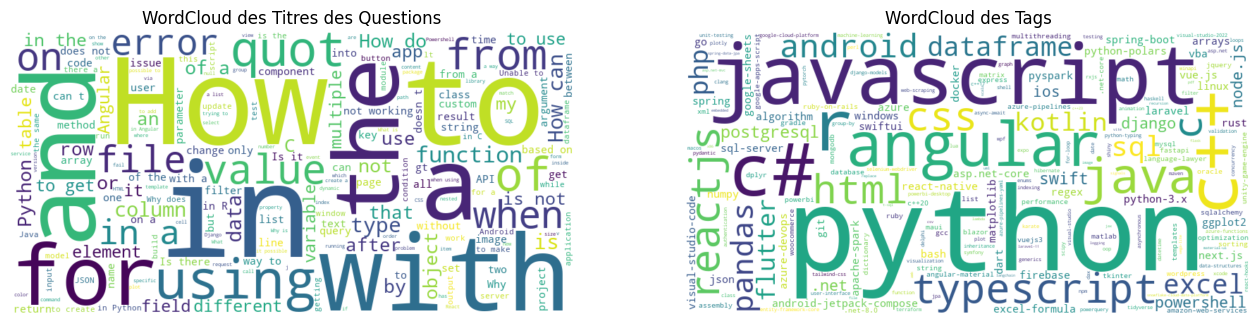

In [16]:

# Générer et afficher les WordClouds
# Créer une liste de tous les tags
all_tags = []
for tags in df_train['tags']:
    if isinstance(tags, list):
        all_tags.extend(tags)

# Compter la fréquence de chaque tag
tag_counts = Counter(all_tags)

# Afficher les 10 tags les plus fréquents pour vérifier
print(tag_counts.most_common(10))

# Générer le WordCloud pour les titres des questions
all_titles = ' '.join(df_train['title'].values)
wordcloud_titles = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(all_titles)

# Générer le WordCloud pour les tags avec séparation correcte par des espaces
wordcloud_tags = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

# Afficher les WordClouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.title('WordCloud des Titres des Questions')
plt.imshow(wordcloud_titles, interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('WordCloud des Tags')
plt.imshow(wordcloud_tags, interpolation='bilinear')
plt.axis('off')

plt.show()